# Fire Plot

In [4]:
import pandas as pd
import folium
import geopandas as gpd
import numpy as np
import json

In [9]:
# !wget https://firms.modaps.eosdis.nasa.gov/data/active_fire/c6/shapes/zips/MODIS_C6_Global_24h.zip
# !mv MODIS_C6_Global_24h.zip ../data/shapeFiles/world

--2020-05-15 13:48:46--  https://firms.modaps.eosdis.nasa.gov/data/active_fire/c6/shapes/zips/MODIS_C6_Global_24h.zip
Resolving firms.modaps.eosdis.nasa.gov (firms.modaps.eosdis.nasa.gov)... 2001:4d0:241a:40c0::34, 198.118.194.34
Connecting to firms.modaps.eosdis.nasa.gov (firms.modaps.eosdis.nasa.gov)|2001:4d0:241a:40c0::34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272036 (266K) [application/zip]
Saving to: ‘MODIS_C6_Global_24h.zip’

MODIS_C6_Global_24h 100%[===================>] 265.66K   218KB/s    in 1.2s    

2020-05-15 13:48:49 (218 KB/s) - ‘MODIS_C6_Global_24h.zip’ saved [272036/272036]



Data: https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/active-fire-data

In [12]:
loc = '../data/shapeFiles/world/'
!unzip {loc}MODIS_C6_Global_24h.zip -d {loc}

Archive:  ../data/shapeFiles/world/MODIS_C6_Global_24h.zip
 extracting: ../data/shapeFiles/world/MODIS_C6_Global_24h.cpg  
  inflating: ../data/shapeFiles/world/MODIS_C6_Global_24h.dbf  
  inflating: ../data/shapeFiles/world/MODIS_C6_Global_24h.prj  
  inflating: ../data/shapeFiles/world/MODIS_C6_Global_24h.shp  
  inflating: ../data/shapeFiles/world/MODIS_C6_Global_24h.shx  


,ACQ_DATE,ACQ_TIME,LATITUDE,LONGITUDE,FRP
0,2020-05-14,0015,-22.467,148.923,10.8
1,2020-05-14,0015,-22.468,148.933,9.8
2,2020-05-14,0015,-23.314,147.689,9.2
3,2020-05-14,0015,-23.316,147.700,9.4
4,2020-05-14,0015,-24.127,151.437,5.2
...,...,...,...,...,...
7935,2020-05-15,0545,15.917,76.710,16.5
7936,2020-05-15,0545,15.862,76.731,20.0
7937,2020-05-15,0545,15.445,76.708,10.4
7938,2020-05-15,0545,11.869,79.639,34.2


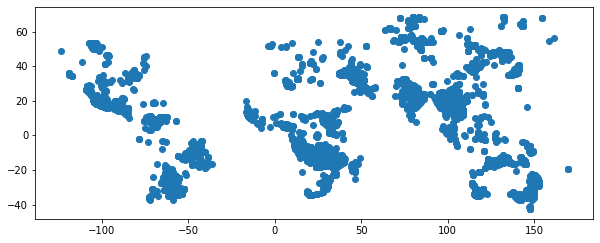

In [15]:
gdf = gpd.read_file("../data/shapeFiles/world/MODIS_C6_Global_24h.shp")
ax = gdf.plot(figsize=(10, 10))
gdf = gdf[['ACQ_DATE', 'ACQ_TIME', 'LATITUDE','LONGITUDE','FRP']]
pd.to_datetime(gdf['ACQ_DATE'] + ' ' + gdf['ACQ_TIME'])
gdf

In [20]:
from folium.plugins import HeatMapWithTime

fire_map = folium.Map(width = 800 ,height=660,
                        zoom_start=7, control_scale = True,
                        tiles="Stamen Terrain",min_lat=6, max_lat=105, min_lon=68, max_lon=97,
                        )
HeatMapWithTime(data=gdf.groupby(['LATITUDE', 'LONGITUDE']).sum().reset_index().values.tolist(), 
        radius=8).add_to(fire_map)
        
fire_map.save('fire_map.html')
fire_map

NameError: name 'HeatMap' is not defined